In [1]:
import pandas as pd
df = pd.read_csv(r'/Users/tomaszbicki/Desktop/dulles_airport.csv', index_col = 'DATE')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22554 entries, 1960-04-01 to 2023-06-17
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  22554 non-null  object 
 1   NAME     22554 non-null  object 
 2   ACMH     11436 non-null  float64
 3   ACSH     11439 non-null  float64
 4   AWND     14407 non-null  float64
 5   FMTM     10105 non-null  float64
 6   FRGT     1 non-null      float64
 7   PGTM     16793 non-null  float64
 8   PRCP     22447 non-null  float64
 9   PSUN     2 non-null      float64
 10  SNOW     22499 non-null  float64
 11  SNWD     22457 non-null  float64
 12  TAVG     6397 non-null   float64
 13  TMAX     22510 non-null  float64
 14  TMIN     22508 non-null  float64
 15  TSUN     957 non-null    float64
 16  WDF1     11436 non-null  float64
 17  WDF2     9902 non-null   float64
 18  WDF5     9839 non-null   float64
 19  WDFG     12029 non-null  float64
 20  WESD     6266 non-null   float64
 21  WSF

In [4]:
#I took the most important factors to predict future temperature
weather = df[['PRCP', 'TMIN', 'TMAX']]

In [5]:
#I am checking if there are any null values
weather.apply(pd.isnull).sum()

PRCP    107
TMIN     46
TMAX     44
dtype: int64

In [7]:
weather['PRCP'].value_counts()

0.00    15222
0.01      741
0.02      452
0.03      342
0.04      292
        ...  
2.61        1
2.11        1
2.13        1
3.56        1
2.18        1
Name: PRCP, Length: 277, dtype: int64

In [8]:
#Because most of values in 'PRCP' column are '0' i am filling null values with '0'
weather['PRCP'] = weather['PRCP'].fillna(0)

/var/folders/64/zx4w1pln7vz714j01w361nhm0000gn/T/ipykernel_6264/1948410435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['PRCP'] = weather['PRCP'].fillna(0)


In [9]:
weather.apply(pd.isnull).sum()

PRCP     0
TMIN    46
TMAX    44
dtype: int64

In [10]:
#I am checking in which periods of time there are missing values in 'TMIN' column
weather[(pd.isnull(weather['TMIN']))]

,PRCP,TMIN,TMAX
DATE,,,
1960-04-02,1.36,NaN,NaN
1960-04-03,0.00,NaN,NaN
1960-04-04,0.00,NaN,70.0
1960-04-09,0.00,NaN,NaN
1960-04-10,0.00,NaN,NaN
1960-04-16,0.00,NaN,NaN
1960-04-17,0.00,NaN,NaN
1960-04-22,0.00,NaN,NaN
1960-04-23,0.00,NaN,NaN


In [11]:
weather.loc['1960-04-15':'1960-04-18']

,PRCP,TMIN,TMAX
DATE,,,
1960-04-15,0.0,53.0,86.0
1960-04-16,0.0,NaN,NaN
1960-04-17,0.0,NaN,NaN
1960-04-18,0.3,50.0,58.0


In [12]:
#Because there is no consistency in missing values in 'TMIN' and 'TMAX' columns i will use ffill method
weather = weather.fillna(method = 'ffill')

In [13]:
weather.apply(pd.isnull).sum()

PRCP    0
TMIN    0
TMAX    0
dtype: int64

In [14]:
#I am checking data type of index
weather.index

Index(['1960-04-01', '1960-04-02', '1960-04-03', '1960-04-04', '1960-04-05',
       '1960-04-06', '1960-04-07', '1960-04-08', '1960-04-09', '1960-04-10',
       ...
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
       '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17'],
      dtype='object', name='DATE', length=22554)

In [15]:
#I am changing data type to date format to be able to proceed more formulas in further steps
weather.index = pd.to_datetime(weather.index)

In [16]:
weather.index

DatetimeIndex(['1960-04-01', '1960-04-02', '1960-04-03', '1960-04-04',
               '1960-04-05', '1960-04-06', '1960-04-07', '1960-04-08',
               '1960-04-09', '1960-04-10',
               ...
               '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17'],
              dtype='datetime64[ns]', name='DATE', length=22554, freq=None)

In [19]:
#I am creating 'target' column which represent max temperature for the next day. That column will be necessary for predicting future temperature
weather['target'] = weather.shift(-1)['TMAX']

In [21]:
weather

,PRCP,TMIN,TMAX,target
DATE,,,,
1960-04-01,0.03,47.0,71.0,71.0
1960-04-02,1.36,47.0,71.0,71.0
1960-04-03,0.00,47.0,71.0,70.0
1960-04-04,0.00,47.0,70.0,48.0
1960-04-05,1.75,42.0,48.0,52.0
...,...,...,...,...
2023-06-13,0.00,52.0,81.0,82.0
2023-06-14,0.03,60.0,82.0,84.0
2023-06-15,0.00,51.0,84.0,82.0


In [22]:
#There is null value in the last day in that dataset, so i am removing that row 
weather = weather.drop(weather.index[-1])

<Axes: xlabel='DATE'>

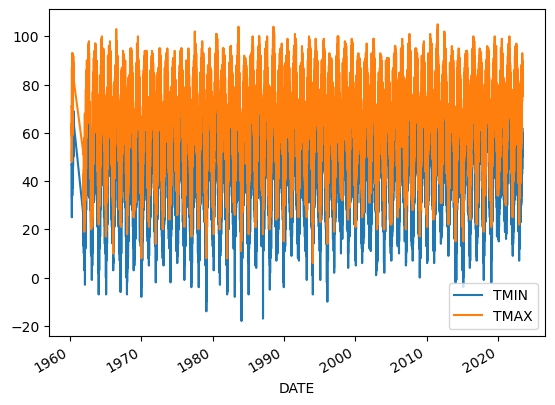

In [24]:
weather[['TMIN', 'TMAX']].plot()

In [31]:
#I used the ridge regression model because it effectively addresses potential multicollinearity issues
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [27]:
#At the begging I will be using only 3 predictors that are already in dataframe, also i am splitting df into 2 groups - training group and testing one
predictors = ['PRCP', 'TMIN', 'TMAX']
train = weather.loc[:'2020-12-31']
test = weather.loc['2021-01-01':]

In [32]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [34]:
predictions = reg.predict(test[predictors])

In [35]:
#I want also to measure how my model is improving while adding new predictors
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(test['target'], predictions)

6.14923378079251

In [37]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)

In [40]:
def create_predictions(weather, reg, predictors):
    train = weather.loc[:'2020-12-31']
    test = weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'prediction']
    return error, combined

In [41]:
#I am creating predictor which will calculate avg temp in each month
weather['month_avg_temp'] = weather['TMAX'].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())

In [42]:
#I am creating predictor which will calculate avg temp in each day of month
weather['day_avg_temp'] = weather['TMAX'].groupby(weather.index.day).apply(lambda x: x.expanding(1).mean())

In [43]:
#I am creating predictor which will calculate avg temp in last 30 days
weather['last_30d_avg_temp'] = weather['TMAX'].rolling(30).mean()

In [44]:
#I am creating predictor which will calculate difference between avg temp in last 30 day and today temp
weather['diff_last_30d_today_temp'] = weather['last_30d_avg_temp']/weather['TMAX']

In [45]:
#Because predictor 'last_30d_avg_temp' is creating rolling average from last 30 days i am removing first 30 rows from dataframe
weather = weather.iloc[30:, :].copy()

In [46]:
predictors = ['PRCP', 'TMIN', 'TMAX', 'month_avg_temp', 'day_avg_temp', 'last_30d_avg_temp', 'diff_last_30d_today_temp']

In [48]:
#Error is decreased by 0.45F
create_predictions(weather, reg, predictors)

(5.69972762188949,
             actual  prediction
 DATE                          
 2021-01-01    56.0   39.447925
 2021-01-02    42.0   51.486971
 2021-01-03    44.0   42.280893
 2021-01-04    40.0   44.012089
 2021-01-05    41.0   41.570208
 ...            ...         ...
 2023-06-12    81.0   79.930367
 2023-06-13    82.0   81.839886
 2023-06-14    84.0   82.484540
 2023-06-15    82.0   83.635048
 2023-06-16    84.0   82.274280
 
 [897 rows x 2 columns])